<a href="https://colab.research.google.com/github/Jpsama1236/ML_algorithms/blob/main/Ridge_keys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_diabetes
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
data = load_diabetes()

In [5]:
df=pd.DataFrame(data.data, columns=data.feature_names)
df['TARGET'] = data.target

In [6]:
df.head(5)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,TARGET
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data.data,data.target,test_size=0.2,random_state=2)

In [8]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

In [9]:
coefs=[]
r2_scores=[]

for i in [1,10,100,1000]:
  reg=Ridge(alpha=i)
  reg.fit(X_train,y_train)
  ypred=reg.predict(X_test)
  coefs.append(reg.coef_.tolist())
  r2_scores.append(r2_score(y_test,ypred))

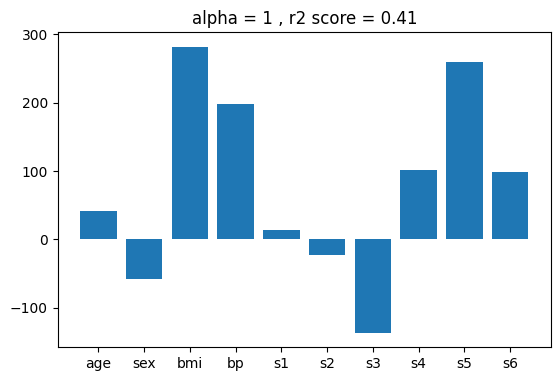

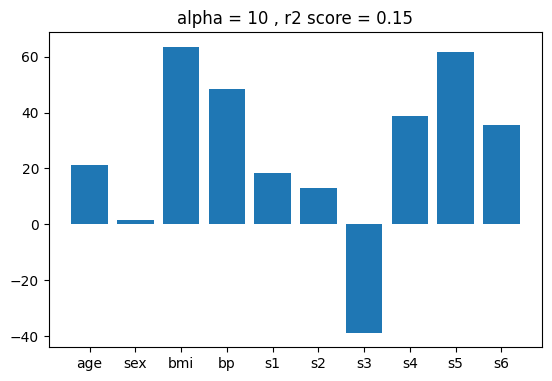

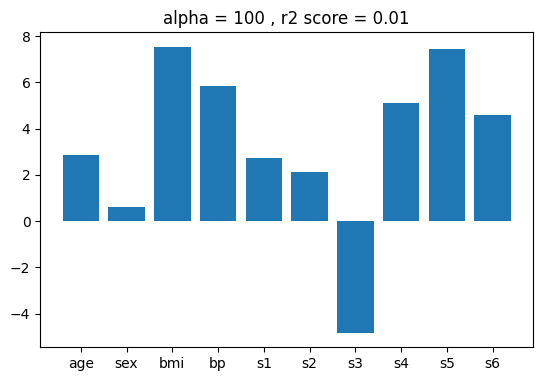

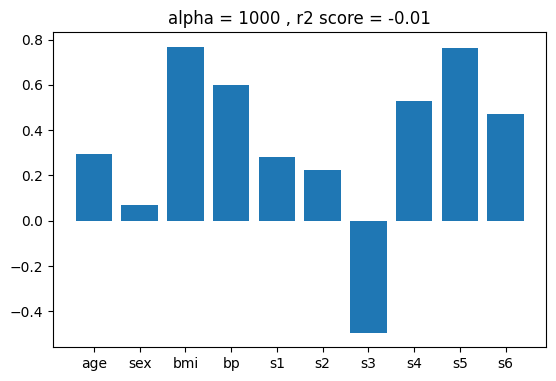

In [15]:
plt.figure(figsize=(14,9))
plt.subplot(221)
plt.bar(data.feature_names,coefs[0])
plt.title("alpha = 1 , r2 score = {}".format(round(r2_scores[0],2)))


plt.figure(figsize=(14,9))
plt.subplot(222)
plt.bar(data.feature_names,coefs[1])
plt.title("alpha = 10 , r2 score = {}".format(round(r2_scores[1],2)))


plt.figure(figsize=(14,9))
plt.subplot(223)
plt.bar(data.feature_names,coefs[2])
plt.title("alpha = 100 , r2 score = {}".format(round(r2_scores[2],2)))


plt.figure(figsize=(14,9))
plt.subplot(224)
plt.bar(data.feature_names,coefs[3])
plt.title("alpha = 1000 , r2 score = {}".format(round(r2_scores[3],2)))
plt.show()

In [16]:
alphas = [0,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]

coefs = []

for i in alphas:
    reg = Ridge(alpha=i)
    reg.fit(X_train,y_train)

    coefs.append(reg.coef_.tolist())

In [25]:
coefs[0]

[-9.15865318117054,
 -205.4543216345216,
 516.6937445408261,
 340.6199990455488,
 -895.5520019034774,
 561.2206790413027,
 153.89310953635965,
 126.7313968784614,
 861.127001522998,
 52.42112237904694]

In [21]:
input_array = np.array(coefs)

In [22]:
input_array.shape

(10, 10)

In [23]:
coef_df = pd.DataFrame(input_array,columns=data.feature_names)
coef_df['alpha'] = alphas
coef_df.set_index('alpha')

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
alpha,,,,,,,,,,
0.0000,-9.158653,-205.454322,516.693745,340.619999,-895.552002,561.220679,153.893110,126.731397,861.127002,52.421122
0.0001,-9.116119,-205.329219,516.889664,340.549436,-883.423872,551.559582,148.587063,125.353015,856.485935,52.468916
0.0010,-8.761487,-204.313404,518.380608,339.967926,-787.700510,475.282181,106.795253,114.629265,819.745723,52.873349
0.0100,-6.399507,-198.662945,522.056516,336.340595,-383.717571,152.670882,-66.053243,75.608209,659.875219,55.829221
0.1000,6.643733,-172.237474,485.529585,314.675846,-72.940209,-80.588688,-174.463527,83.614710,484.365316,73.585091
1.0000,42.242528,-57.304483,282.172125,198.059395,14.363734,-22.551079,-136.929684,102.023069,260.104294,98.552692
10.0000,21.174024,1.659837,63.659826,48.492858,18.421510,12.875466,-38.915435,38.842475,61.612302,35.505383
100.0000,2.858980,0.629453,7.540605,5.849949,2.710879,2.142135,-4.834047,5.108223,7.448451,4.576129
1000.0000,0.295726,0.069290,0.769004,0.597824,0.282900,0.225936,-0.495607,0.527031,0.761496,0.471029


In [30]:
alphas = [0,0.0001,0.0005,0.001,0.005,0.1,0.5,1,5,10]

coefs = []

for i in alphas:
    reg = Ridge(alpha=i)
    reg.fit(X_train,y_train)

    coefs.append(reg.coef_.tolist())

In [31]:
input_array = np.array(coefs).T

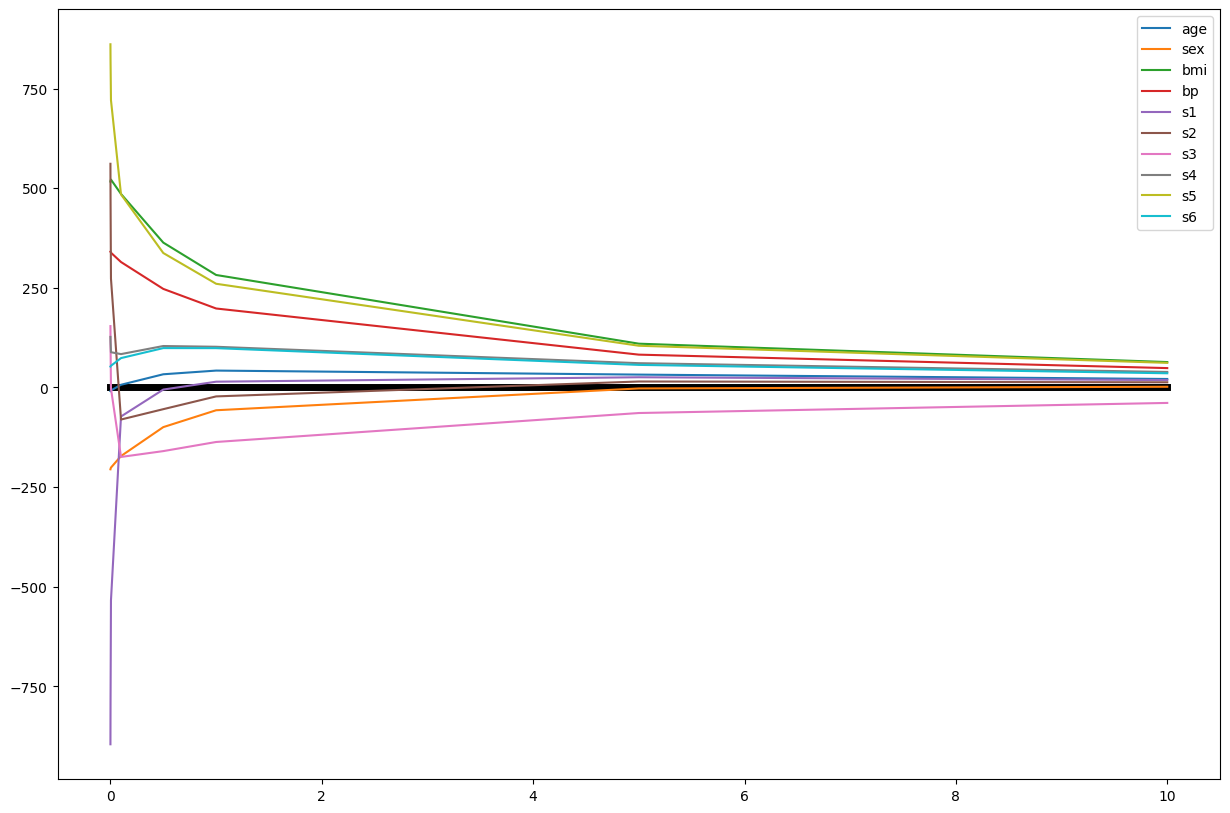

In [32]:
plt.figure(figsize=(15,10))
plt.plot(alphas,np.zeros(len(alphas)),color='black',linewidth=5)

for i in range(input_array.shape[0]):
  plt.plot(alphas,input_array[i],label=data.feature_names[i])
plt.legend()

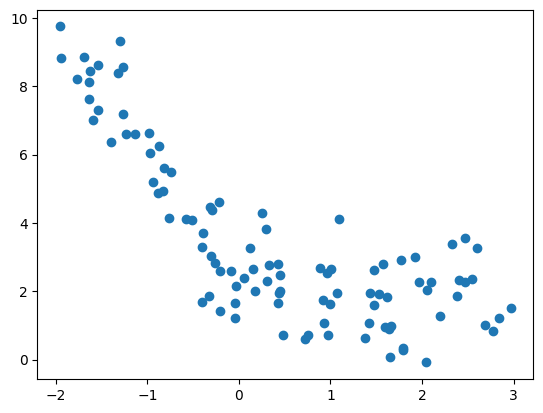

In [33]:
m = 100
X = 5 * np.random.rand(m, 1) - 2
y = 0.7 * X ** 2 - 2 * X + 3 + np.random.randn(m, 1)

plt.scatter(X, y)
plt.show()

In [34]:
X_train,X_test,y_train,y_test = train_test_split(X.reshape(100,1),y.reshape(100),test_size=0.2,random_state=2)

In [35]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=15)

X_train = poly.fit_transform(X_train)
X_test = poly.transform(X_test)

In [37]:
from mlxtend.evaluate import bias_variance_decomp

In [41]:
alphas=np.linspace(0,30,100)
loss=[]
bias=[]
variance=[]
for i in alphas:
  reg=Ridge(alpha=i)
  reg.fit(X_train,y_train)
  avg_expected_loss, avg_bias, avg_var =bias_variance_decomp(reg,X_train,y_train,X_test,y_test,loss='mse',random_seed=123)
  loss.append(avg_expected_loss)
  bias.append(avg_bias)
  variance.append(avg_var)

Text(0.5, 0, 'Alphas')

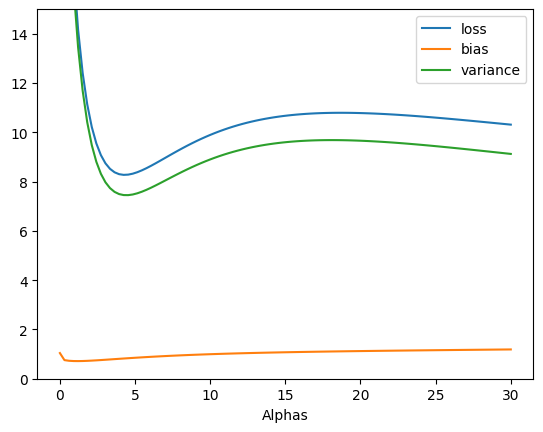

In [50]:
plt.plot(alphas,loss,label='loss')
plt.plot(alphas,bias,label='bias')
plt.plot(alphas,variance,label='variance')
plt.legend()
plt.ylim(0,15)
plt.xlabel('Alphas')

[27.82809103]
-2.29474455867698


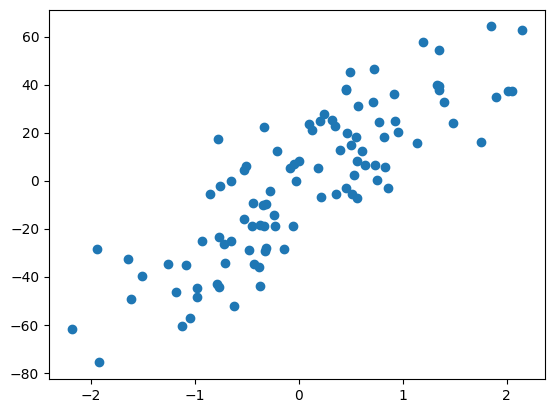

In [51]:
from sklearn.datasets import make_regression

X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

plt.scatter(X,y)

from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X,y)
print(reg.coef_)
print(reg.intercept_)

In [52]:
def cal_loss(m,alpha):
    return np.sum((y - m*X.ravel() + 2.29)**2) + alpha*m*m

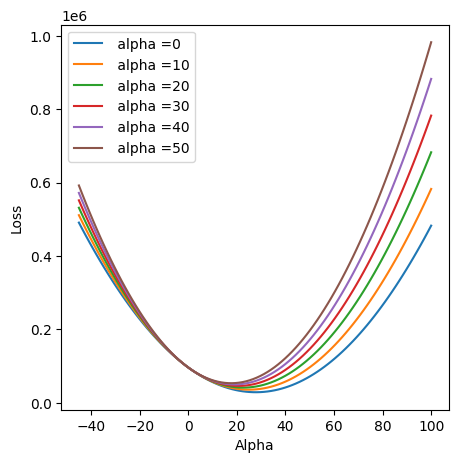

In [54]:
m=np.linspace(-45,100,100)
plt.figure(figsize=(5,5))
for j in [0,10,20,30,40,50]:
  loss=[]
  for i in range(m.shape[0]):
    loss_m=cal_loss(m[i],j)
    loss.append(loss_m)
  plt.plot(m,loss,label=" alpha ={}".format(j))
plt.legend()
plt.xlabel('Alpha')
plt.ylabel('Loss')
plt.show()